In [1]:
%matplotlib notebook

/Users/david/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


<IPython.core.display.Javascript object>


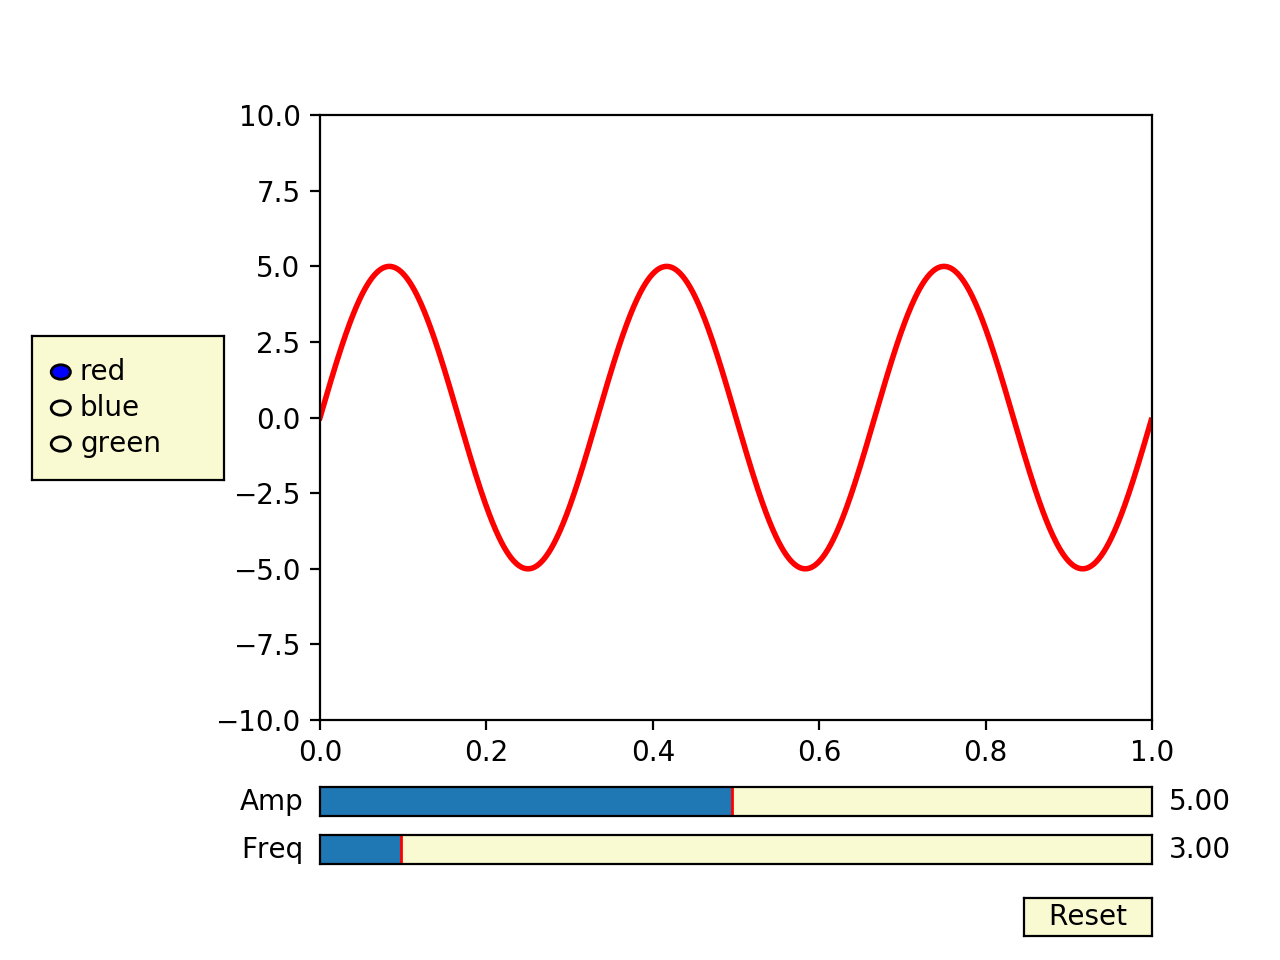

0

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t, s, lw=2, color='red')
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()
sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

In [3]:
import matplotlib.colors

In [5]:
from matplotlib.widgets import TextBox

<IPython.core.display.Javascript object>


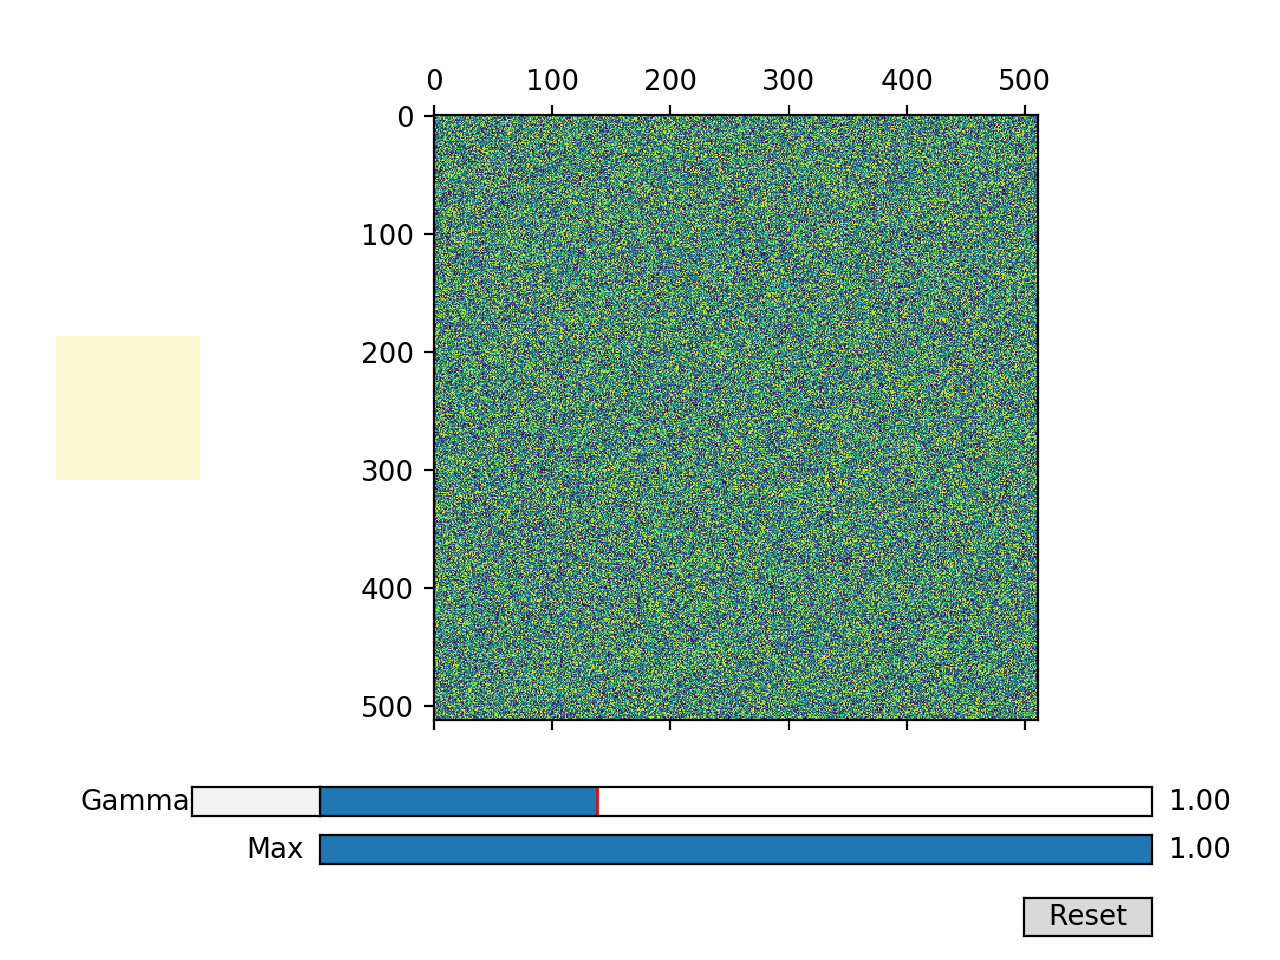

0

In [12]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=0.25, bottom=0.25)
t = np.random.rand(512, 512)
a0 = t.max()
g0 = 1
# s = a0*np.sin(2*np.pi*g0*t)
l = ax.matshow(t)
# plt.axis([0, 1, -10, 10])
axgamma = fig.add_axes([0.25, 0.15, 0.65, 0.03])
axgamma2 = fig.add_axes([0.15, 0.15, 0.1, 0.03])
axvmax = fig.add_axes([0.25, 0.1, 0.65, 0.03])

sgamma = Slider(axgamma, '', 0.0, 3.0, valinit=g0, dragging=False)
svmax = Slider(axvmax, 'Max', t.min(), t.max(), valinit=a0)
tgamma = TextBox(axgamma2, "Gamma")

def update(val):
    vmax = svmax.val
    gamma = sgamma.val
    l.set_norm(matplotlib.colors.PowerNorm(gamma, vmax=vmax))
    fig.canvas.draw_idle()
sgamma.on_changed(update)
svmax.on_changed(update)
def update2(val):
    sgamma.set_val(float(tgamma.text))
tgamma.on_submit(update2)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='g')


def reset(event):
    sgamma.reset()
    svmax.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

In [13]:
import pandas as pd
import numpy as np

In [15]:
%load_ext autoreload
%autoreload 2
import palm_diagnostics as pdiag

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
data = pd.DataFrame(columns=pdiag.PALMData.peak_col.values(), data=np.random.rand(100, len(pdiag.PALMData.peak_col)))

In [17]:
data[['sigma_x', 'sigma_y', 'sigma_z']] = data[['sigma_x', 'sigma_y', 'sigma_z']] * 0.005

In [135]:
img = pdiag.gen_img((1,1), data, mag=1000, diffraction_limit=True, cmap="coolwarm")

/Users/david/anaconda3/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


In [20]:
from matplotlib.colors import ListedColormap

In [116]:
img.save_color("test2.png", gamma=0.5, vmax=100, alpha=True)

In [138]:
from dphplotting import auto_adjust

In [140]:
auto_adjust(pdiag.PowerNorm(0.5)(img.alpha))

(0.015625, 0.0703125)

In [149]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

In [ ]:
AnchoredSizeBar()

In [161]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

<IPython.core.display.Javascript object>


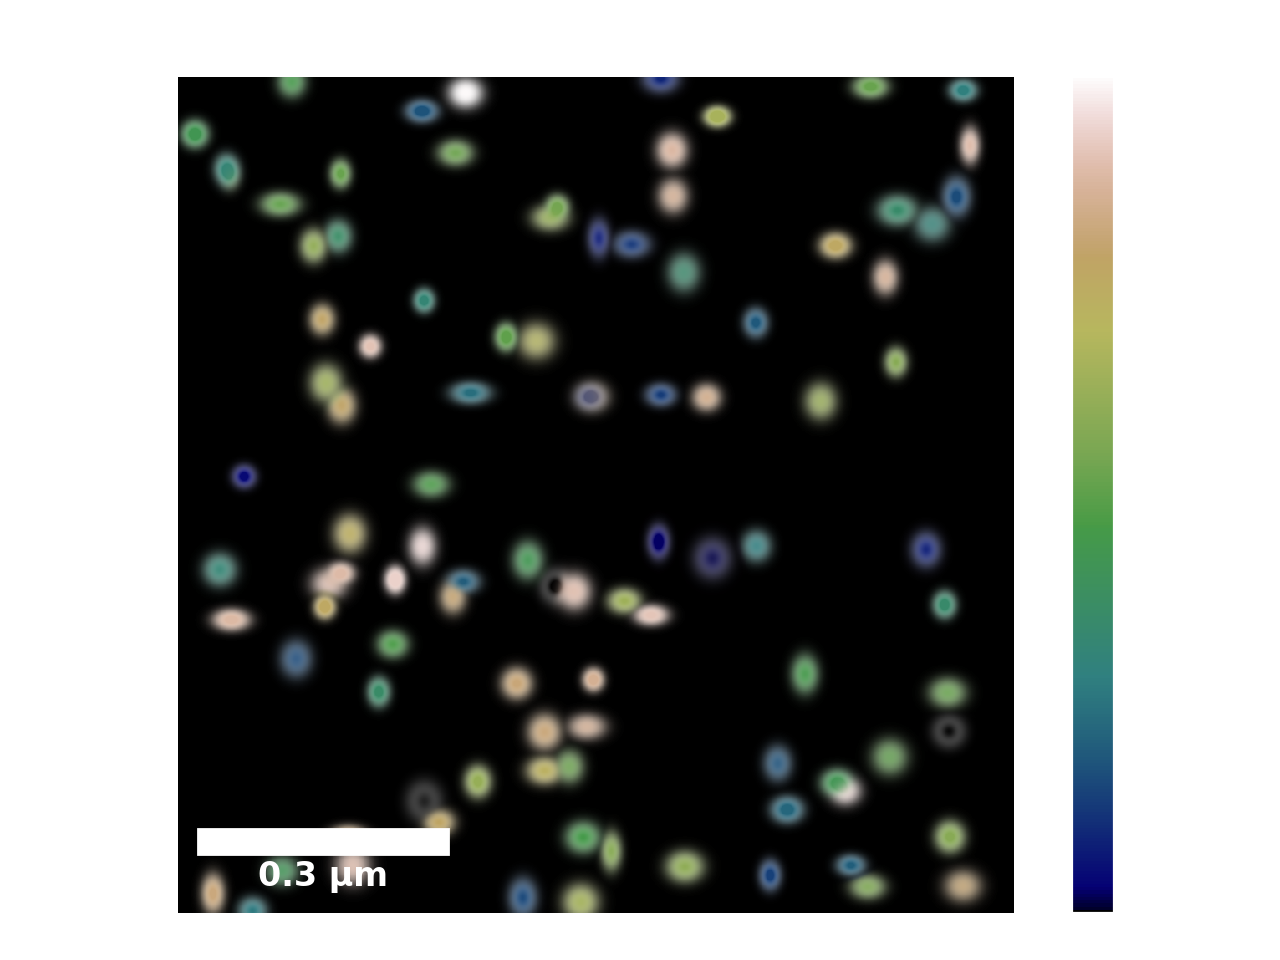

In [165]:
with plt.style.context("dark_background"):
    img = pdiag.DepthCodedImage.load("test.tif")
    fig, ax = img.plot(pixel_size=1, scalebar_size=0.3, auto=True, norm_kwargs=dict(gamma=0.5, vmax=100))
    fig.tight_layout()
#     fig.savefig("testp.png", dpi=300, bbox_inches="tight", transparent=True)

<IPython.core.display.Javascript object>


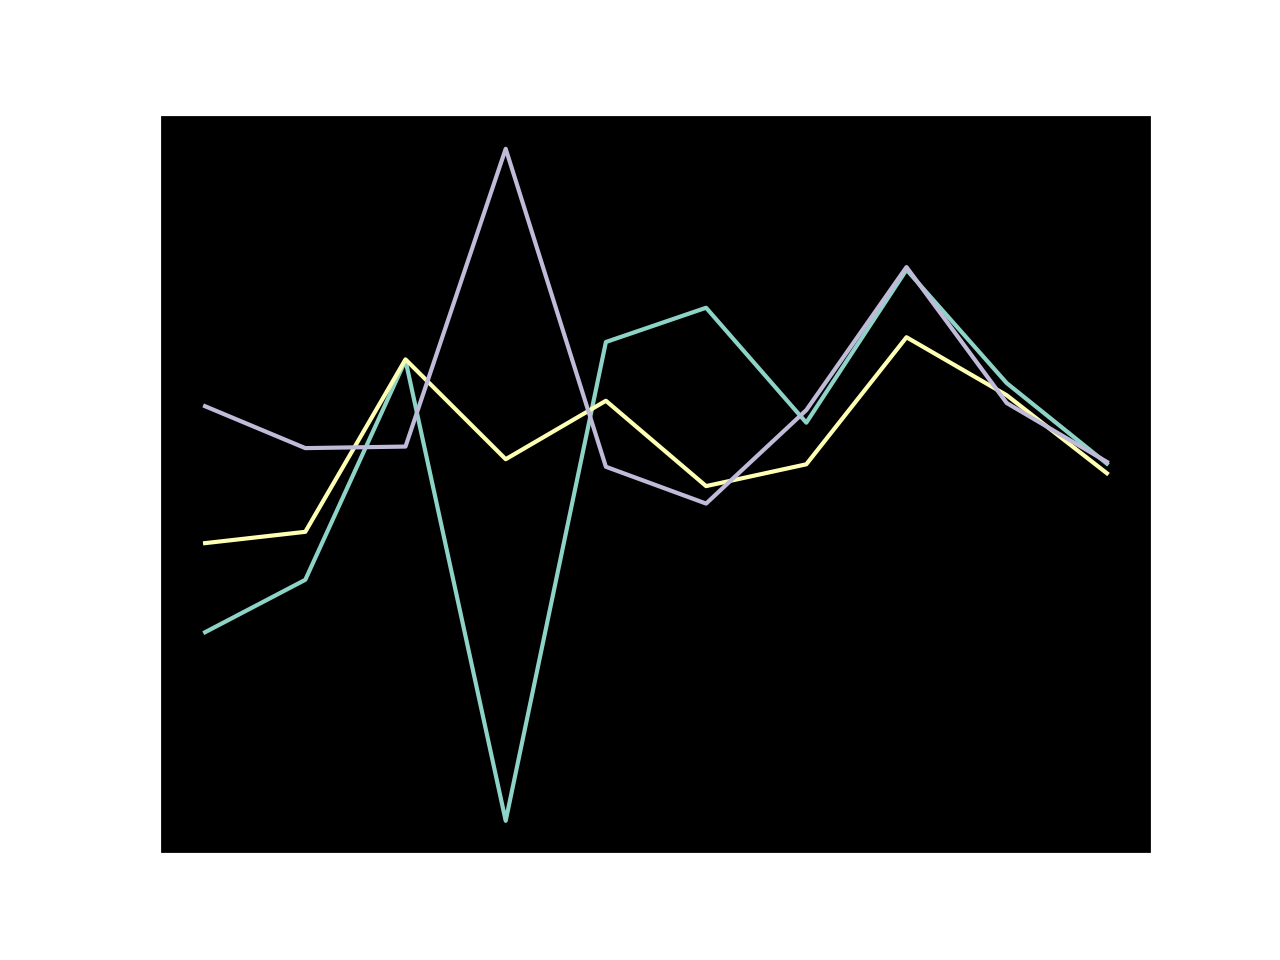

In [166]:
with plt.style.context("dark_background"):
    plt.figure()
    plt.plot(np.random.randn(10,3))

In [167]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

In [186]:
import matplotlib.font_manager as fm

<IPython.core.display.Javascript object>


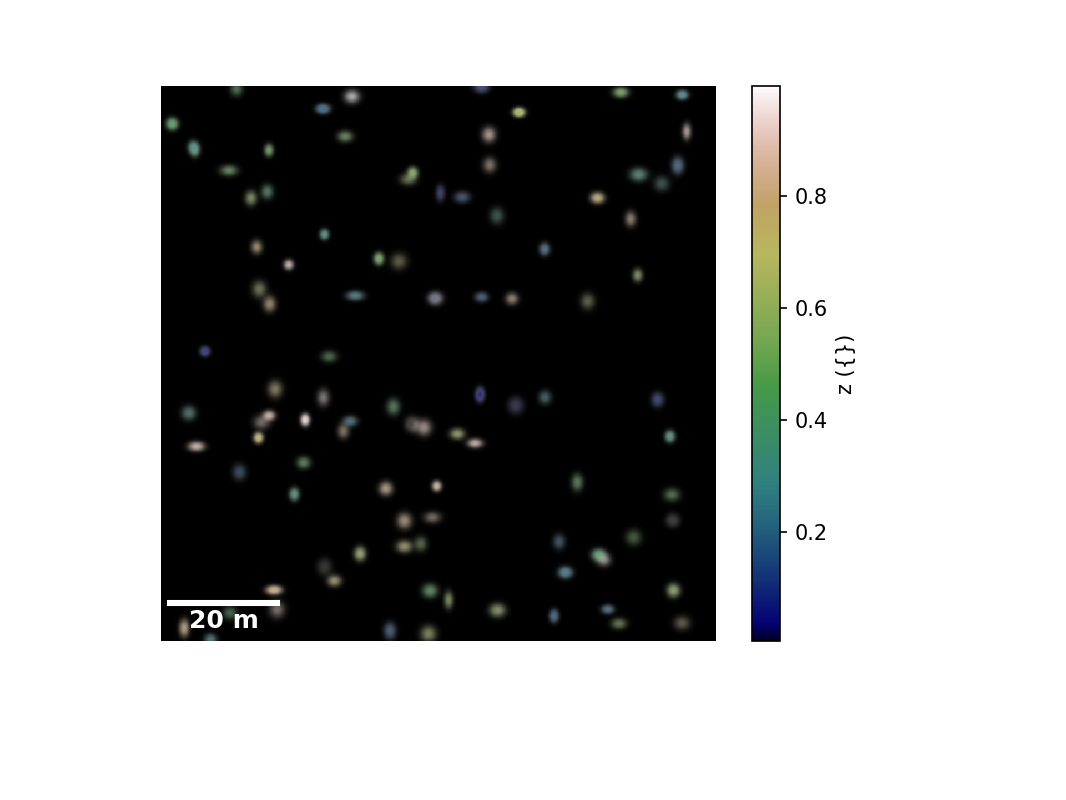

In [201]:
# with plt.style.context("dph_presentation"):
fig, ax = plt.subplots()
cbar = ax.matshow(np.linspace(dci.zrange[0], dci.zrange[1], 256).reshape(16, 16), cmap=dci.cmap)
ax.imshow(dci2.data[..., :3], interpolation=None)
ax.matshow(dci2.data[..., 3], norm=pdiag.PowerNorm(1), cmap=ListedColormap([(i / 255,) * 3 + ((255 - i) / 255,) for i in range(256)]))
fig.colorbar(cbar, label="z ({})")
scalebar = AnchoredSizeBar(ax.transData,
                           200, '20 m', 'lower left', 
                           pad=0.2,
                           color='white',
                           frameon=False,
                           size_vertical=20/3,
                          fontproperties=fm.FontProperties(size="large", weight="bold"))
ax.set_axis_off()
ax.add_artist(scalebar)